In [2]:
import numpy as np
import xarray as xr
import os.path as op
from dask.diagnostics import ProgressBar
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
import matplotlib.colors as clrs
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/swot/SUM05/takaya/MITgcm/channel/runs'

In [4]:
ys, dy = (42,5)
dt = 3e2
ts = int((ys*360*86400)/dt)
te = int(((ys+dy)*360*86400)/dt)
print(ts,te)

4354560 4872960


In [5]:
ds1 = open_mdsdataset(op.join(ddir,'deepML-2mon_5kmconstMOM'), grid_dir=op.join(ddir,'5km_grid'),
                     iters=range(ts,te,4320), prefix=['MOMsnap'], delta_t=dt
                     )
ds1

/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/deepML-2mon_5kmconstMOM. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 120)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG      (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG      (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC,

In [6]:
grid = Grid(ds1, periodic=['X'])

In [7]:
ts = int((ys*360*86400)/dt+8640)
te = int(((ys+dy)*360*86400)/dt+8640)
print(ts,te)

ds2 = open_mdsdataset(op.join(ddir,'deepML-2mon_5kmconstMOM'), grid_dir=op.join(ddir,'5km_grid'),
                     iters=range(ts,te,8640), prefix=['MOMtave'], delta_t=3e2
                     )

with ProgressBar():
    ds2_clim = ds2.mean(['time','XC']).load()
ds2_clim

4363200 4881600


/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/deepML-2mon_5kmconstMOM. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


[#####                                   ] | 13% Completed |  0.1s

/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


[########################################] | 100% Completed |  8.5s


<xarray.Dataset>
Dimensions:  (XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76)
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    dyG      (YC, XG) >f4 5000.0 5000.0 5000.0 5000.0 5000.0 5000.0 5000.0 ...
    rAz      (YG, XG) >f4 25000000.0 25000000.0 25000000.0 25000000.0 ...
    dxC      (YC, XG) >f4 5000.0 5000.0 5000.0 5000.0 5000.0 5000.0 5000.0 ...
    rAw      (YC, XG) >f4 25000000.0 25000000.0 25000000.0 25000000.0 ...
    drC      (Zp1) >f4 0.5 1.07 1.22 1.395

In [8]:
dsanom = ds1-ds2_clim
up = grid.interp(dsanom.UVEL,'X')
vp = grid.interp(dsanom.VVEL,'Y',boundary='fill')
wp = grid.interp(dsanom.WVEL,'Z',boundary='fill')
phip = dsanom.PHIHYD

In [9]:
bp = grid.interp(grid.diff(phip,'Z',boundary='fill')/grid.diff(phip.Z,'Z',boundary='fill'),
                 'Z',boundary='fill')
bp

<xarray.DataArray 'mul-7d3d0074639a0079a366e17615c4abac' (time: 120, Z: 76, YC: 400, XC: 200)>
dask.array<shape=(120, 76, 400, 200), dtype=float32, chunksize=(1, 1, 400, 200)>
Coordinates:
  * time     (time) float64 1.306e+09 1.308e+09 1.309e+09 1.31e+09 1.312e+09 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...

In [10]:
ts = int((ys*360*86400)/dt+8640)
te = int(((ys+dy)*360*86400)/dt+8640)
print(ts,te)

ds3 = open_mdsdataset(op.join(ddir,'deepML-2mon_5kmconstPotT'), grid_dir=op.join(ddir,'5km_grid'),
                     iters=range(ts,te,8640), prefix=['Ttave'], delta_t=dt
                     )

with ProgressBar():
    ds3_clim = ds3.mean(['time','XC']).load()
ds3_clim

4363200 4881600


/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/deepML-2mon_5kmconstPotT. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


[                                        ] | 0% Completed |  0.1s

/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


[########################################] | 100% Completed |  1.1s


<xarray.Dataset>
Dimensions:  (XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76)
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    dyG      (YC, XG) >f4 5000.0 5000.0 5000.0 5000.0 5000.0 5000.0 5000.0 ...
    rAz      (YG, XG) >f4 25000000.0 25000000.0 25000000.0 25000000.0 ...
    dxC      (YC, XG) >f4 5000.0 5000.0 5000.0 5000.0 5000.0 5000.0 5000.0 ...
    rAw      (YC, XG) >f4 25000000.0 25000000.0 25000000.0 25000000.0 ...
    drC      (Zp1) >f4 0.5 1.07 1.22 1.395

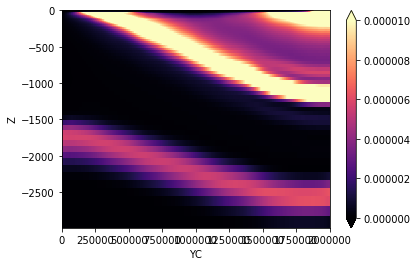

In [11]:
Ttave = ds3_clim.Ttave
# Ttave.plot()
g = 9.81
alpha = 2e-4
with ProgressBar():
    N2 = grid.interp(alpha*g * grid.diff(Ttave,'Z',boundary='fill')
                    / grid.diff(Ttave.Z,'Z',boundary='fill'),
                    'Z',boundary='fill').load()
N2.plot(vmax=1e-5, vmin=0., cmap='magma')

In [12]:
N2.sel(YC=slice(5e5,15e5)).mean('YC')

<xarray.DataArray (Z: 76)>
array([-7.726613e-03,  1.209027e-07,  8.942505e-08,  7.954997e-08,
        7.627350e-08,  7.656173e-08,  7.963730e-08,  8.563792e-08,
        9.568822e-08,  1.126782e-07,  1.456426e-07,  2.544613e-07,
        9.677419e-07,  1.828460e-06,  2.359738e-06,  2.863827e-06,
        3.227287e-06,  3.522023e-06,  3.809532e-06,  4.129071e-06,
        4.493258e-06,  4.896271e-06,  5.305301e-06,  5.680698e-06,
        6.003817e-06,  6.271987e-06,  6.488965e-06,  6.666341e-06,
        6.817499e-06,  6.951263e-06,  7.070391e-06,  7.170800e-06,
        7.244108e-06,  7.283213e-06,  7.282187e-06,  7.235491e-06,
        7.143221e-06,  7.013595e-06,  6.861665e-06,  6.706508e-06,
        6.568113e-06,  6.460197e-06,  6.384112e-06,  6.328822e-06,
        6.277568e-06,  6.211625e-06,  6.107395e-06,  5.927974e-06,
        5.612773e-06,  5.085531e-06,  4.296695e-06,  3.288163e-06,
        2.222267e-06,  1.318441e-06,  7.272395e-07,  4.458487e-07,
        3.480735e-07,  2.987643e-07

3.38867698701506e-06


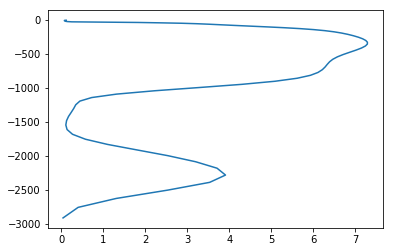

In [13]:
print(N2[1:].sel(YC=slice(5e5,15e5)).mean().values)
plt.plot(N2[1:].sel(YC=slice(5e5,15e5)).mean('YC')*1e6, N2.Z[1:])

# Along-track = zonal
Invoking isotrophy, the direction along which the difference is taken "shouldn't" matter.

In [98]:
N = bp.shape
rg = np.arange(1,int(.5*N[-1]),2)
us = np.zeros((len(rg), len(ds1.Z)))
vs = np.zeros((len(rg), len(ds1.Z)))
ws = np.zeros((len(rg), len(ds1.Z)))
bs = np.zeros((len(rg), len(ds1.Z)))
N2mean = N2.sel(YC=slice(5e5,15e5)).mean('YC').compute()

for i in range(len(rg)):
    print(5*rg[i], 'km')
    du = up - up.shift(XC=int(rg[i]))
    dv = vp - vp.shift(XC=int(rg[i]))
    dw = wp - wp.shift(XC=int(rg[i]))
    db = bp - bp.shift(XC=int(rg[i]))

    us[i] = (du**3).sel(YC=slice(5e5,15e5))[:,:,::10,::10].mean(['time','YC','XC']).compute()
    vs[i] = (du*dv**2).sel(YC=slice(5e5,15e5))[:,:,::10,::10].mean(['time','YC','XC']).compute()
    ws[i] = (du*dw**2).sel(YC=slice(5e5,15e5))[:,:,::10,::10].mean(['time','YC','XC']).compute()
    bs[i] = ((du*db**2).sel(YC=slice(5e5,15e5))[:,:,::10,::10].mean(['time','YC','XC'])
            * N2mean**-1).compute()

V = us + vs
Sl = us
St = vs + ws + bs
print(us,bs)

5 km
15 km
25 km
35 km
45 km
55 km
65 km
75 km
85 km
95 km
105 km
115 km
125 km
135 km
145 km
155 km
165 km
175 km
185 km
195 km
205 km
215 km
225 km
235 km
245 km
255 km
265 km
275 km
285 km
295 km
305 km
315 km
325 km
335 km
345 km
355 km
365 km
375 km
385 km
395 km
405 km
415 km
425 km
435 km
445 km
455 km
465 km
475 km
485 km
495 km
[[-4.94883761e-06 -4.90203320e-06 -4.84767088e-06 ... -2.50302854e-08
  -2.71253118e-08 -2.68833720e-08]
 [-4.48482897e-05 -4.42963210e-05 -4.36550436e-05 ... -4.38212766e-07
  -4.97418341e-07 -5.09909114e-07]
 [-5.10200080e-05 -5.00704809e-05 -4.89966587e-05 ... -4.64085730e-07
  -6.17808041e-07 -6.86485464e-07]
 ...
 [-5.16796834e-04 -5.17416920e-04 -5.18191082e-04 ... -3.19534547e-06
  -2.63664128e-06 -2.17236084e-06]
 [-8.20335408e-04 -8.21572728e-04 -8.22881470e-04 ... -7.99654663e-06
  -6.98115673e-06 -6.63047513e-06]
 [-7.53123139e-04 -7.54517503e-04 -7.55989167e-04 ... -1.38087771e-05
  -1.27326948e-05 -1.21234607e-05]] [[-3.91068257e-04 -7.4655

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


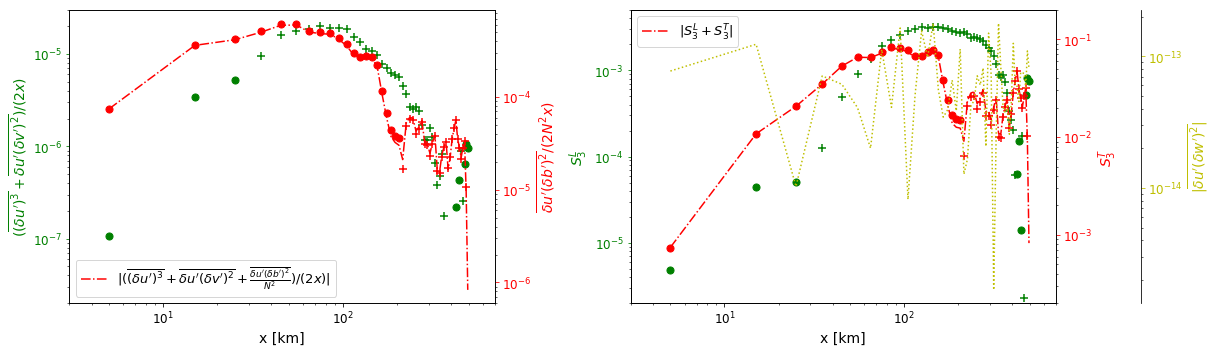

In [115]:
nz = 1 
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(17,5))
fig.set_tight_layout(True)
ax3 = ax1.twinx()
ax4 = ax2.twinx()
ax5 = ax2.twinx()
ax5.spines["right"].set_position(("axes", 1.2))

ax3.plot(5*rg, np.abs((V+bs)[:,1]/(2*5*rg)) ,'r-.', 
        label=r"|$(\overline{(\delta u')^3} + \overline{\delta u'(\delta v')^2} + \frac{\overline{\delta u'(\delta b')^2}}{N^2})/(2x)$|"
        )
for i in range(len(rg)):
    if us[i,nz] > 0.:
        ax1.scatter(5*rg[i], V[i,nz]/(2*5*rg[i]), marker='+', c='g', s=60.)
    else:
        ax1.scatter(5*rg[i], np.abs(V[i,nz]/(2*5*rg[i])), marker='o', c='g', s=50.)
    if bs[i,nz] > 0.:
        ax3.scatter(5*rg[i], bs[i,nz]/(2*5*rg[i]), marker='+', c='r', s=60.)
    else:
        ax3.scatter(5*rg[i], np.abs(bs[i,nz]/(2*5*rg[i])), marker='o', c='r', s=50.)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax3.set_yscale('log')
ax1.set_xlim([3,7e2])
ax1.set_ylim([2e-8,3e-5])
# ax2.set_ylim([5e-6,1e-3])
# ax2.set_xlim([1,1e3])
ax1.tick_params(axis='y', colors='g')
ax1.set_ylabel(r"$(\overline{(\delta u')^3} + \overline{\delta u'(\delta v')^2})/(2x)$", fontsize=14, color='g')
ax3.tick_params(axis='y', colors='r')
ax3.set_ylabel(r"$\overline{\delta u'(\delta b')^2}/(2N^2x)$", fontsize=14, color='r')
ax1.set_xlabel(r"x [km]", fontsize=14)
ax3.legend(loc='lower left', fontsize=13)
ax1.set_xticks([10,100])
ax1.set_yticks([1e-7,1e-6,1e-5])
ax1.set_xticklabels([r"10$^1$",r"10$^2$"],{'fontsize':12})
ax1.set_yticklabels([r"10$^{-7}$",r"10$^{-6}$",r"10$^{-5}$"],{'fontsize':12})
ax3.set_yticks([1e-6,1e-5,1e-4])
ax3.set_yticklabels([r"10$^{-6}$",r"10$^{-5}$",r"10$^{-4}$"],{'fontsize':12})

ax4.plot(5*rg, np.abs((Sl+St)[:,1]) ,'r-.', 
        label=r"|$S_3^L + S_3^T$|"
        )
ax5.plot(5*rg, np.abs((ws)[:,1]) ,'y:')
for i in range(len(rg)):
    if Sl[i,nz] > 0.:
        ax2.scatter(5*rg[i], Sl[i,nz], marker='+', c='g', s=60.)
    else:
        ax2.scatter(5*rg[i], np.abs(Sl[i,nz]), marker='o', c='g', s=50.)
    if bs[i,nz] > 0.:
        ax4.scatter(5*rg[i], St[i,nz], marker='+', c='r', s=60.)
    else:
        ax4.scatter(5*rg[i], np.abs(St[i,nz]), marker='o', c='r', s=50.)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax4.set_yscale('log')
ax5.set_yscale('log')
ax2.set_xlim([3,7e2])
ax2.set_ylim([2e-6,5e-3])
ax4.set_ylim([2e-4,2e-1])
# ax2.set_xlim([1,1e3])
ax2.tick_params(axis='y', colors='g')
ax2.set_ylabel(r"$S_3^L$", fontsize=14, color='g')
ax4.tick_params(axis='y', colors='r')
ax4.set_ylabel(r"$S_3^T$", fontsize=14, color='r')
ax5.tick_params(axis='y', colors='y')
ax5.set_ylabel(r"|$\overline{\delta u'(\delta w')^2}$|", fontsize=14, color='y')
ax2.set_xlabel(r"x [km]", fontsize=14)
ax4.legend(loc='upper left', fontsize=13)
ax2.set_xticks([10,100])
ax2.set_yticks([1e-5,1e-4,1e-3])
ax2.set_xticklabels([r"10$^1$",r"10$^2$"],{'fontsize':12})
ax2.set_yticklabels([r"10$^{-5}$",r"10$^{-4}$",r"10$^{-3}$"],{'fontsize':12})
ax4.set_yticks([1e-3,1e-2,1e-1])
ax4.set_yticklabels([r"10$^{-3}$",r"10$^{-2}$",r"10$^{-1}$"],{'fontsize':12})
ax5.set_yticks([1e-14,1e-13])
ax5.set_yticklabels([r"10$^{-14}$",r"10$^{-13}$"],{'fontsize':12})

plt.savefig(op.join(ddir,'Figures/KE-PEflux.pdf'))

# Isotropic difference between two random points

In [20]:
r = np.arange(1e1,5e2,2e1)*1e3
r

array([ 10000.,  30000.,  50000.,  70000.,  90000., 110000., 130000.,
       150000., 170000., 190000., 210000., 230000., 250000., 270000.,
       290000., 310000., 330000., 350000., 370000., 390000., 410000.,
       430000., 450000., 470000., 490000.])

In [66]:
N = 1e2
us = np.zeros((len(r), len(ds1.time[::15]), len(ds1.Z)))
bs = np.zeros((len(r), len(ds1.time[::15]), len(ds1.Z)))

for i in range(len(r)):
    print(r[i]*1e-3,'km')
    for j in range(len(ds1.time[::15])):
        for trial in range(int(N)):
            angle = 2*np.pi*np.random.random_sample()
            x1 = np.random.randint(2500,997500+1)
            y1 = np.random.randint(502500,1497500+1)

            u1 = up[::15][j].sel(YC=y1, method='nearest').sel(XC=x1, method='nearest')
            v1 = vp[::15][j].sel(YC=y1, method='nearest').sel(XC=x1, method='nearest')
            U1 = np.sqrt(u1**2+v1**2)
#             arc1 = np.arctan(u1/v1)
            arc1 = np.angle(u1+1j*v1)
            ul1 = U1*np.cos(arc1-angle)
            ut1 = U1*np.sin(arc1-angle)
            b1 = bp[::15][j].sel(YC=y1, method='nearest').sel(XC=x1, method='nearest')

            dx = r[i]*np.cos(angle)
            dy = r[i]*np.sin(angle)
            x2 = x1+dx
            y2 = y1+dy
            if x2 > ds1.XC[-1]:
                x2 -= ds1.XC[-1]
            elif x2 < ds1.XC[0]:
                x2 += ds1.XC[-1]

            u2 = up[::15][j].sel(YC=y2, method='nearest').sel(XC=x2, method='nearest')
            v2 = vp[::15][j].sel(YC=y2, method='nearest').sel(XC=x2, method='nearest')
            U2 = np.sqrt(u2**2+v2**2)
#             arc2 = np.arctan(u2/v2)
            arc2 = np.angle(u2+1j*v2)
            ul2 = U2*np.cos(arc2-angle)
            ut2 = U2*np.sin(arc2-angle)
            b2 = bp[::15][j].sel(YC=y2, method='nearest').sel(XC=x2, method='nearest')

            dul = ul2-ul1.data
            dut = ut2-ut1.data
            db = b2-b1.data
#             if i==0 and j==0 and trial==0:
#                 print(dul,dut,db)
            us[i,j] += (dul**3 + dul*dut**2).values
            bs[i,j] += (dul*db**2).values

        us[i,j] /= N 
        bs[i,j] /= (N*N2.sel(YC=slice(5e5,15e5)).mean())

10.0 km
30.0 km
50.0 km
70.0 km
90.0 km
110.0 km
130.0 km
150.0 km
170.0 km
190.0 km
210.0 km
230.0 km
250.0 km
270.0 km
290.0 km
310.0 km
330.0 km
350.0 km
370.0 km
390.0 km
410.0 km
430.0 km
450.0 km
470.0 km
490.0 km


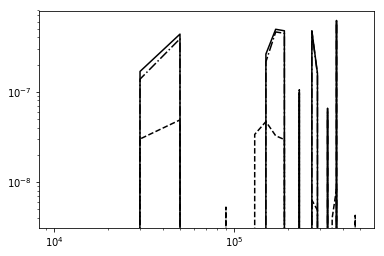

In [77]:
fig, ax = plt.subplots()
ax.plot(r, us.mean(axis=1)[:,1]/(2*r) ,'k--')
ax.plot(r, bs.mean(axis=1)[:,1]/(2*r) ,'k-.')
ax.plot(r, (us+bs).mean(axis=1)[:,1]/(2*r) ,'k')
ax.set_xscale('log')
ax.set_yscale('log')

In [68]:
print(ul1.values, ut1.values, ul2.values, ut2.values)

[0.17673148 0.17688404 0.17703505 0.17718829 0.1773443  0.17750154
 0.17765732 0.17780645 0.1779387  0.17803466 0.17805906 0.1779397
 0.17748629 0.17640112 0.17499627 0.1736903  0.17289369 0.17287694
 0.1737693  0.17445113 0.17001684 0.16512308 0.16011027 0.15484422
 0.14913338 0.14349659 0.13792019 0.13244058 0.12639761 0.11890557
 0.10962448 0.09845427 0.085301   0.07118497 0.05910265 0.05091154
 0.04633514 0.04443924 0.04414831 0.04468627 0.04479676 0.04420609
 0.04330749 0.041949   0.04060512 0.03958346 0.03902628 0.03869449
 0.03854553 0.03842739 0.03829722 0.0380753  0.03784866 0.03765732
 0.03747772 0.03727997 0.0370655  0.03685861 0.03669005 0.03657122
 0.03651538 0.03647859 0.03651747 0.03643213 0.03598521 0.03459258
 0.03109601 0.02562125 0.0194138  0.0144561  0.0114264  0.00999475
 0.00975668 0.00980078 0.00982299 0.00950702] [-7.73944259e-02 -7.72718340e-02 -7.71235749e-02 -7.69443735e-02
 -7.67277479e-02 -7.64664114e-02 -7.61498585e-02 -7.57638663e-02
 -7.52913430e-02 -7.4